In [1]:
import sys
sys.path.append('../')

import numpy as np
import cv2
import lib.utils as utils
import matplotlib.pyplot as plt

from lib.gui.openFile import OpenFile
from lib.gui.cropImage import CropImage
from lib.gui.createBinary import CreateBinary
from lib.gui.detectCircuit import DetectCircuit

from tkinter import *

from PIL import Image as PIL_Image, ImageTk as PIL_ImageTk

In [2]:
#image = utils.loadImage(path="./../resources/testImages",name="hand2.jpg", resize=(500,None))
#image_size = (image.shape[1], image.shape[0])

#(thresh, binary) = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

#plt.imshow(image, interpolation="bilinear", cmap="gray")

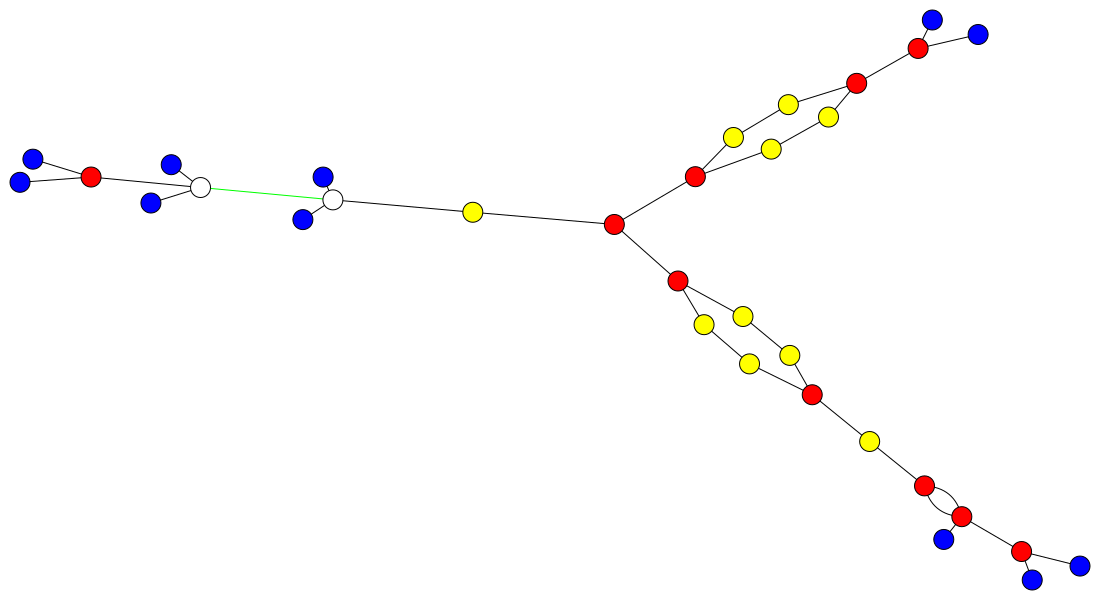

In [4]:
def get_frames(root, next):
    frames = []
    data = [-1]
    frames.append(OpenFile(root, next))
    frames.append(CropImage(root, (0.01,0.01,0.7,0.95)))
    frames.append(CreateBinary(root, (0.01,0.01,0.7,0.95)))
    frames.append(DetectCircuit(root, (0.01,0.01,0.7,0.95)))
    

    data = data * len(frames)

    return frames, data

In [5]:
def next():
    global frames, frame_data, frame_index
    if frame_index < len(frames)-1:
        frame_data[frame_index] = frames[frame_index].remove()
        frame_index += 1
        frames[frame_index].add(frame_data[frame_index-1])

def back():
    global frames, frame_data, frame_index
    if frame_index > 0:
        frame_data[frame_index] = frames[frame_index].remove()
        frame_index -= 1
        if frame_index > 0:
            frames[frame_index].add(frame_data[frame_index-1])
        else:
            frames[frame_index].add(-1)

In [6]:
def resize(event):
    global size, frames, frame_index
    new_size = (event.width, event.height)

    if str(event.widget) != '.':
        return
    
    if new_size != size:
        #print("EVEEEEENT")
        frames[frame_index].resize()#(event.width-size[0], event.height-size[1]))
        size = new_size

In [7]:
root = Tk()

size = (900,600)

root.title('Smarter Circuits')
root.geometry('{x}x{y}'.format(x=size[0], y=size[1]))

root.bind('<Configure>', resize)

frames, frame_data = get_frames(root, next)
frame_index = 0

frames[0].add()

back_button = Button(root, text='Back', command=back)
back_button.place(relx=0.8, rely=0.9, relwidth=0.1, relheight=0.05)

next_button = Button(root, text='Next', command=next)
next_button.place(relx=0.8, rely=0.8, relwidth=0.1, relheight=0.05)

#canvas = Canvas(root, width=image_size[0], height=image_size[1])      
#canvas.pack()
#tkImg = convertImage(image)
#canvas_img = canvas.create_image(20,20, anchor=NW, image=tkImg)
##canvas.create_rectangle(20, 20, 50, 50, fill='red')
#
#s1_value = DoubleVar()
#s1 = Scale(root, from_=0, to=255, length=200, orient=HORIZONTAL, variable=s1_value, command=s1_changed)
#s1.set(100)
#s1.pack()


root.mainloop()

resistor
inductor
ground
ground
ground
capacitor
voltage
